In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

In [27]:
# Ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Load dataset from local directory
df = pd.read_csv(r'C:\Users\DELL\K-Mean1\Mall_Customers.csv')

In [28]:
# Show the first few rows of the dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [29]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [30]:
# Check basic statistics of the data
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [31]:
# Data types info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


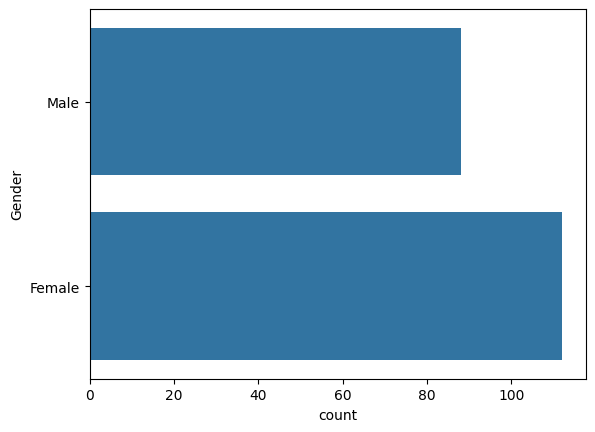

In [32]:
sns.countplot(df['Gender'])
plt.show()

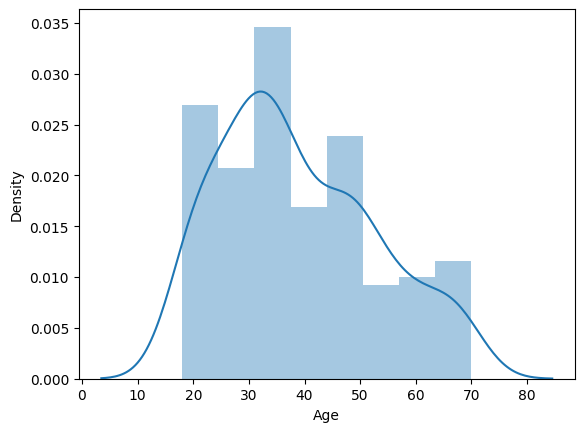

In [33]:
sns.distplot(df['Age'])
plt.show()

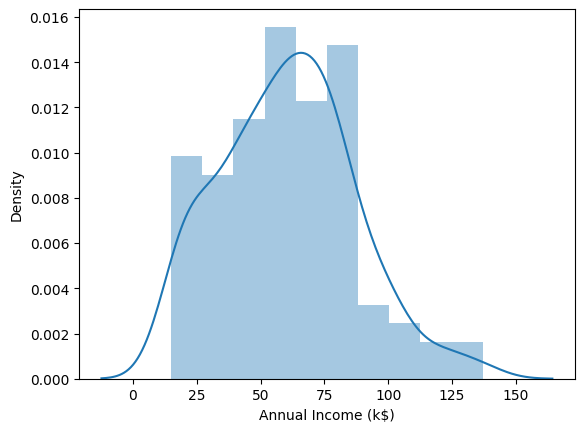

In [34]:
sns.distplot(df['Annual Income (k$)'])
plt.show()

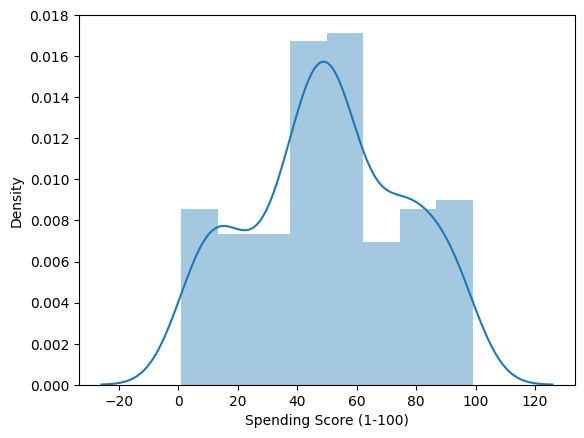

In [35]:
sns.distplot(df['Spending Score (1-100)'])
plt.show()

<Axes: >

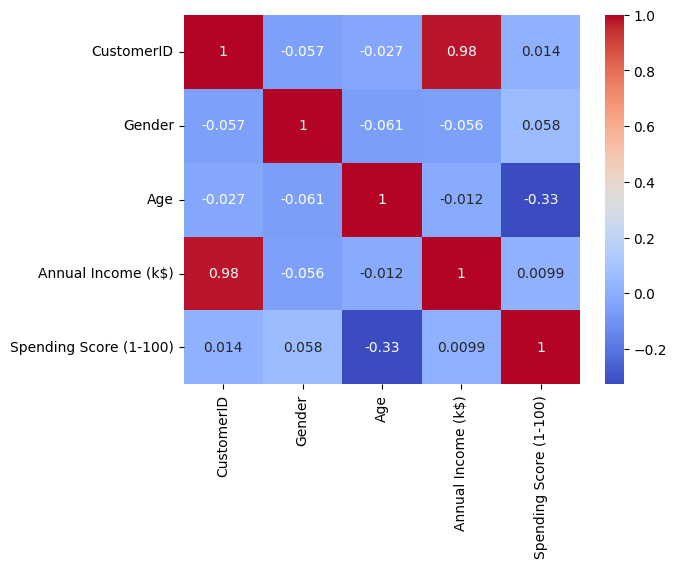

In [9]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [10]:
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [12]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1_scaled)
    errors.append(kmeans.inertia_)

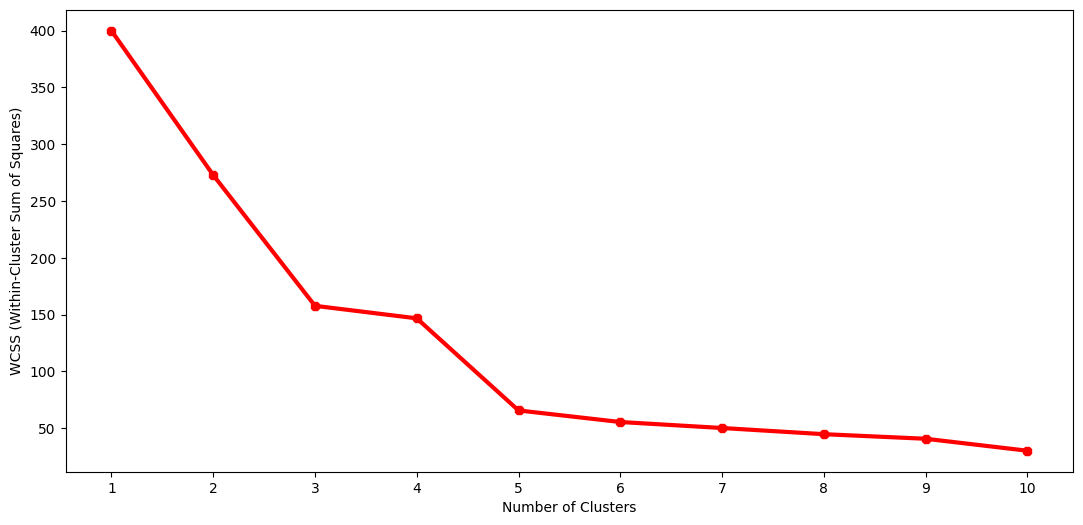

In [13]:
plt.figure(figsize=(13,6))
plt.plot(range(1, 11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [14]:
km = KMeans(n_clusters=5)
km.fit(df1_scaled)
df1['Label'] = km.predict(df1_scaled)

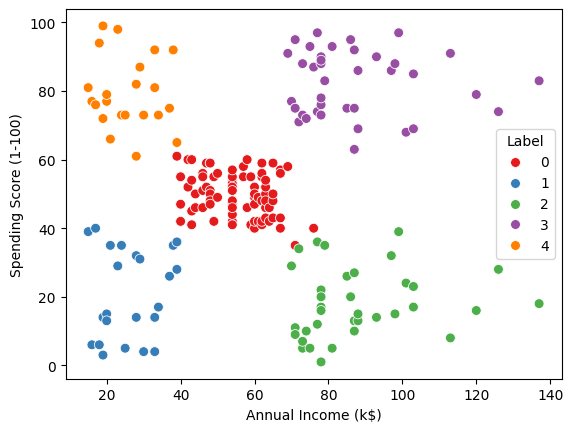

In [15]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette='Set1')
plt.show()

In [16]:
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

In [17]:
df2_scaled = scaler.fit_transform(df2)

In [18]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_scaled)
    errors.append(kmeans.inertia_)

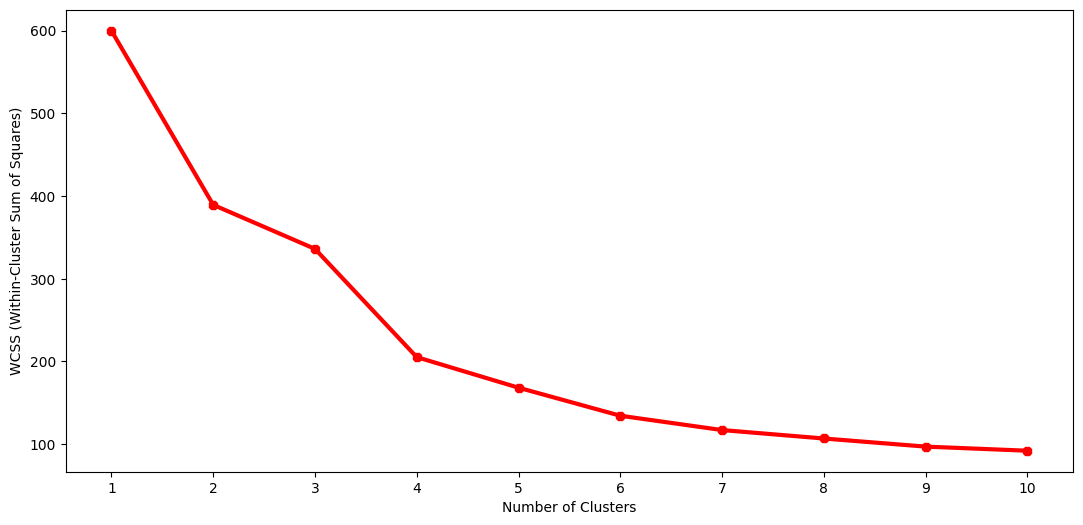

In [19]:
plt.figure(figsize=(13,6))
plt.plot(range(1, 11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [20]:
km = KMeans(n_clusters=5)
km.fit(df2_scaled)
df2['Label'] = km.predict(df2_scaled)

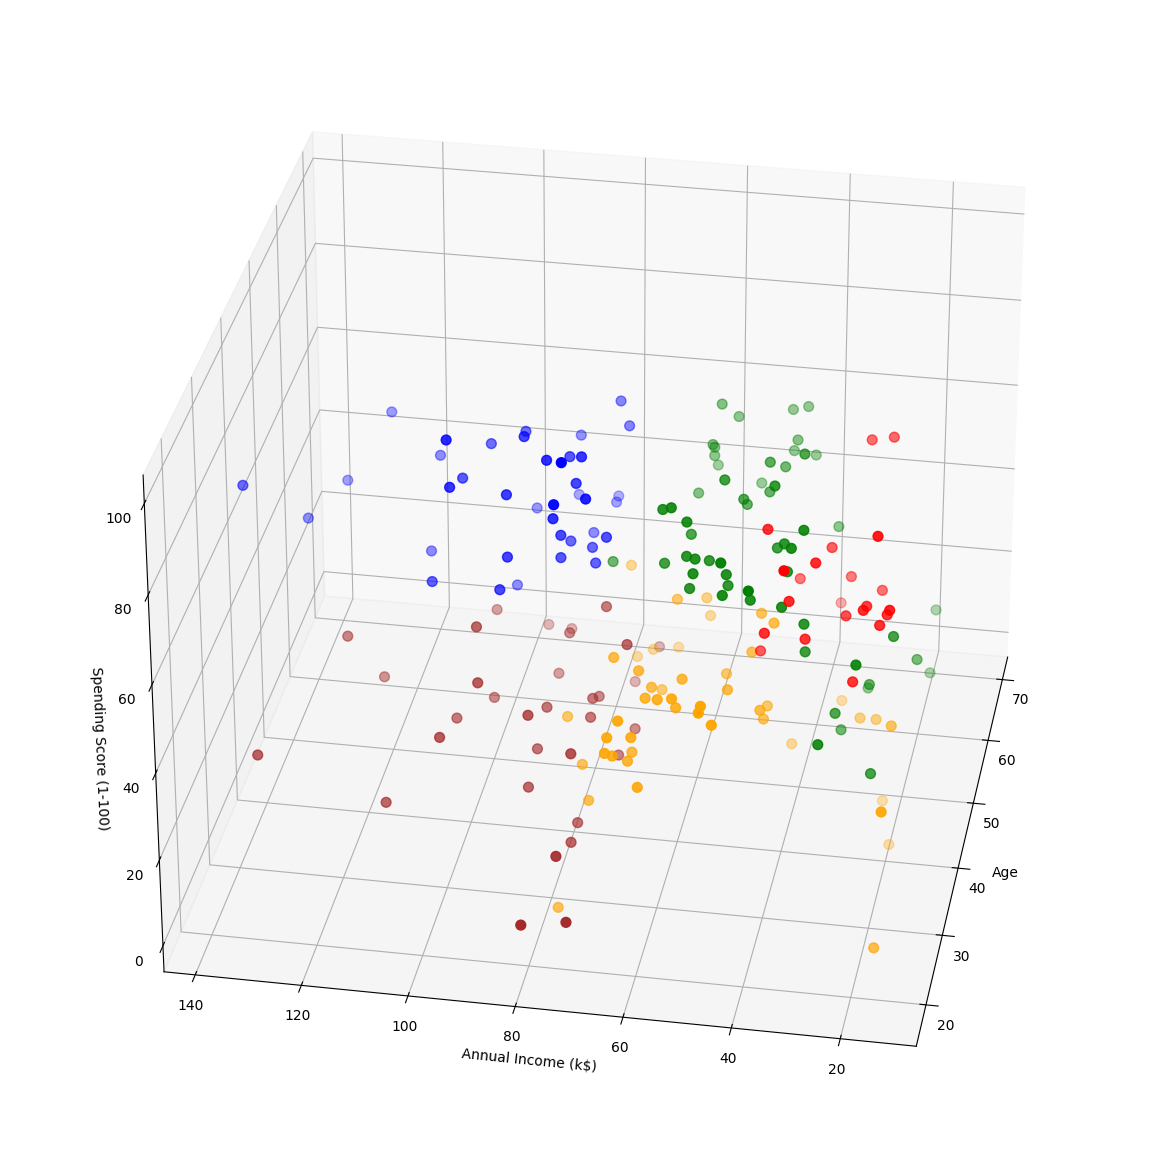

In [22]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)

ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [23]:
for i in range(5):
    print(f"Cluster {i}:")
    print(df2[df2['Label'] == i].describe())

Cluster 0:
       Annual Income (k$)  Spending Score (1-100)        Age  Label
count           22.000000               22.000000  22.000000   22.0
mean            25.727273               79.363636  25.272727    0.0
std              7.566731               10.504174   5.257030    0.0
min             15.000000               61.000000  18.000000    0.0
25%             19.250000               73.000000  21.250000    0.0
50%             24.500000               77.000000  23.500000    0.0
75%             32.250000               85.750000  29.750000    0.0
max             39.000000               99.000000  35.000000    0.0
Cluster 1:
       Annual Income (k$)  Spending Score (1-100)        Age  Label
count           58.000000               58.000000  58.000000   58.0
mean            48.482759               41.775862  55.551724    1.0
std             13.797077               15.658688   8.324920    0.0
min             19.000000                3.000000  42.000000    1.0
25%             40.500000 